# Unit 5 - Financial Planning


In [77]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import requests
import json

%matplotlib inline

In [78]:
# Load .env enviroment variables
load_dotenv('alpaca.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [79]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3


In [80]:
# Crypto API URLs
#btc_url = "https://api.alternative.me/v2/ticker/bitcoin/?convert=USD"
btc_url = "https://api.alternative.me/v1/ticker/bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v1/ticker/ethereum/?convert=USD"

In [81]:
# Fetch current BTC price


response_btc=requests.get(btc_url).json()
#print(json.dumps(response_btc, indent=4))
btc_price = float(response_btc[0]['price_usd'])
#print(type(btc_price))
print(f'The current price of Bitcoin (BTC) is: ${btc_price:0.2f}')


The current price of Bitcoin (BTC) is: $57387.00


In [82]:

# Fetch current ETH price
response_eth=requests.get(eth_url).json()
#print(json.dumps(response_eth, indent=4))
eth_price = float(response_eth[0]['price_usd'])
#print(type(eth_price))
print(f'The current price of Ethereum (ETH) is: ${eth_price:0.2f}')

The current price of Ethereum (ETH) is: $2029.41


In [83]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
crypto_balance=my_btc_value + my_eth_value
print(f'The current value of your wallet in "USD" is ${crypto_balance:0.2f}')
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your wallet in "USD" is $79620.27
The current value of your 1.2 BTC is $68864.40
The current value of your 5.3 ETH is $10755.87


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [84]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [85]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [86]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame
df_portfolio.index=df_portfolio.index.date
df_portfolio

AGG                                     SPY                  \
              open    high     low   close   volume   open    high     low   
2021-04-01  113.93  114.05  113.83  114.02  9491631  398.4  400.67  398.18   

                              
             close    volume  
2021-04-01  400.53  72714084

In [87]:
# Pick AGG and SPY close prices
df_closing_price=pd.DataFrame()

df_closing_price['AGG'] = df_portfolio['AGG']['close']
df_closing_price['SPY'] = df_portfolio['SPY']['close']
print(df_closing_price)
print('--------------------------')
# Print AGG and SPY close prices
print(f'Current AGG closing price: ${df_closing_price.iloc[0][0]}')
print(f'Current SPY closing price: ${df_closing_price.iloc[0][1]}')

               AGG     SPY
2021-04-01  114.02  400.53
--------------------------
Current AGG closing price: $114.02
Current SPY closing price: $400.53


In [88]:
# Compute the current value of shares
my_agg_value = df_closing_price.iloc[0][0] * my_agg
my_spy_value = df_closing_price.iloc[0][1] * my_spy
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
shares_total_value = my_agg_value + my_spy_value
#shares

The current value of your 50 SPY shares is $20026.50
The current value of your 200 AGG shares is $22804.00


### Savings Health Analysis

In [89]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame()

savings = {
      'amount':[crypto_balance,shares_total_value]
}

df_savings = pd.DataFrame(savings, index = ["Crypto", "Shares"])
df_savings

# Display savings DataFrame
#display(df_savings)

,amount
Crypto,79620.273
Shares,42830.500


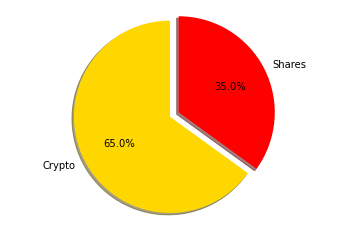

In [90]:
# Plot savings pie chart

import matplotlib.pyplot as plt

# Data to plot
labels = 'Crypto', 'Shares'
sizes = [crypto_balance, shares_total_value,]
colors = ['gold', 'red']
explode = (0.1, 0, )  

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [91]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f'The ideal emergency fund is set to three months of income at ${emergency_fund}')
# Calculate total amount of savings
total_amount_of_savings = crypto_balance + shares_total_value
print(f'The current amount of savings is currently is: ${total_amount_of_savings:0.2f}')
# Validate saving health

excess = 0

if total_amount_of_savings > emergency_fund:
    print('Your savings stand above the established level of safety')
elif total_amount_of_savings == emergency_fund:
    print('your saving are at the minimun level established beware of any market swings')

else :
    print('your savings are below the minimum amount established')
    


The ideal emergency fund is set to three months of income at $36000
The current amount of savings is currently is: $122450.77
Your savings stand above the established level of safety


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [92]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
# Since we can only display 1000 result per request with a paper account we do 2 requests we two timeframes

start_date_1 = pd.Timestamp('2016-04-01', tz='America/New_York').isoformat()
end_date_1 = pd.Timestamp('2017-04-11', tz='America/New_York').isoformat()

In [93]:
# Get 5 years' worth of historical data for SPY and AGG

timeframe ='1D'

df_portfolio_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date_1,
    end = end_date_1,
    limit=1000
).df

# Display sample data
df_portfolio_1.index = df_portfolio_1.index.date
df_portfolio_1

AGG                                          SPY           \
              open      high       low   close   volume    open     high   
2016-04-01  110.53  110.6599  110.3500  110.54  5013983  204.34  207.140   
2016-04-04  110.60  110.6700  110.5100  110.59  3018930  206.83  207.070   
2016-04-05  110.95  110.9750  110.7100  110.79  2617545  204.67  205.260   
2016-04-06  110.80  110.8000  110.6235  110.75  1858620  204.29  206.490   
2016-04-07  110.98  111.0500  110.7700  110.99  1608325  205.14  205.560   
...            ...       ...       ...     ...      ...     ...      ...   
2017-04-05  108.48  108.7400  108.4530  108.69  1900282  236.26  237.390   
2017-04-06  108.64  108.7100  108.4800  108.67  1599535  234.95  236.040   
2017-04-07  108.80  108.8900  108.4200  108.44  1668826  235.15  236.000   
2017-04-10  108.53  108.6500  108.4901  108.57  1751500  235.36  236.255   
2017-04-11  108.76  108.9800  108.7500  108.90  2054745  234.87  235.180   

                                       
                low   close    volume  
2016-04-01  203.980  206.89  82800637  
2016-04-04  205.890  206.27  47328510  
2016-04-05  203.890  204.19  67894686  
2016-04-06  203.980  206.43  75909355  
2016-04-07  203.090  203.94  90240651  
...             ...     ...       ...  
2017-04-05  234.540  234.77  84819899  
2017-04-06  234.425  235.39  53559902  
2017-04-07  234.640  235.17  53293901  
2017-04-10  234.730  235.32  46610548  
2017-04-11  233.340  235.04  63951745  

[260 rows x 10 columns]

In [94]:
start_date_2 = pd.Timestamp('2017-04-12', tz='America/New_York').isoformat()
end_date_2 = pd.Timestamp('2021-04-01', tz='America/New_York').isoformat()

timeframe ='1D'

df_portfolio_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date_2,
    end = end_date_2,
    limit=1000
).df

# Display sample data
df_portfolio_2.index = df_portfolio_2.index.date
df_portfolio_2




AGG                                           SPY          \
              open     high      low    close     volume    open    high   
2017-04-12  108.93  109.200  108.890  109.140  2243678.0  234.74  234.96   
2017-04-13  109.25  109.390  109.130  109.280  2004878.0  233.63  234.49   
2017-04-17  109.30  109.400  109.180  109.220  1432374.0  233.11  234.57   
2017-04-18  109.41  109.700  109.390  109.665  2200401.0  233.71  234.49   
2017-04-19  109.47  109.560  109.390  109.470  1986888.0  234.52  234.95   
...            ...      ...      ...      ...        ...     ...     ...   
2021-03-26  113.91  114.075  113.860  113.930  3287634.0  390.93  396.41   
2021-03-29  113.52  114.000  113.520  113.720  5526443.0  394.40  396.75   
2021-03-30  113.64  113.850  113.525  113.815  4692114.0  394.42  395.45   
2021-03-31  113.84  113.980  113.710  113.820  5846835.0  395.34  398.00   
2021-04-01  113.93  114.050  113.830  114.020  9491702.0  398.40  400.67   

                                      
               low   close    volume  
2017-04-12  233.77  234.10  55338215  
2017-04-13  232.54  232.54  63216959  
2017-04-17  232.88  234.57  46820072  
2017-04-18  233.08  233.86  52786936  
2017-04-19  233.18  233.47  53760209  
...            ...     ...       ...  
2021-03-26  390.29  395.99  90959116  
2021-03-29  392.81  395.77  85589461  
2021-03-30  393.02  394.40  62537671  
2021-03-31  395.31  396.28  88541243  
2021-04-01  398.18  400.53  72713146  

[1000 rows x 10 columns]

In [95]:
#Join the two dataframes 

df_portfolio_combined = pd.concat([df_portfolio_1, df_portfolio_2], axis = 'rows', join= 'inner')
df_portfolio_combined

AGG                                             SPY          \
              open      high       low    close     volume    open    high   
2016-04-01  110.53  110.6599  110.3500  110.540  5013983.0  204.34  207.14   
2016-04-04  110.60  110.6700  110.5100  110.590  3018930.0  206.83  207.07   
2016-04-05  110.95  110.9750  110.7100  110.790  2617545.0  204.67  205.26   
2016-04-06  110.80  110.8000  110.6235  110.750  1858620.0  204.29  206.49   
2016-04-07  110.98  111.0500  110.7700  110.990  1608325.0  205.14  205.56   
...            ...       ...       ...      ...        ...     ...     ...   
2021-03-26  113.91  114.0750  113.8600  113.930  3287634.0  390.93  396.41   
2021-03-29  113.52  114.0000  113.5200  113.720  5526443.0  394.40  396.75   
2021-03-30  113.64  113.8500  113.5250  113.815  4692114.0  394.42  395.45   
2021-03-31  113.84  113.9800  113.7100  113.820  5846835.0  395.34  398.00   
2021-04-01  113.93  114.0500  113.8300  114.020  9491702.0  398.40  400.67   

                                      
               low   close    volume  
2016-04-01  203.98  206.89  82800637  
2016-04-04  205.89  206.27  47328510  
2016-04-05  203.89  204.19  67894686  
2016-04-06  203.98  206.43  75909355  
2016-04-07  203.09  203.94  90240651  
...            ...     ...       ...  
2021-03-26  390.29  395.99  90959116  
2021-03-29  392.81  395.77  85589461  
2021-03-30  393.02  394.40  62537671  
2021-03-31  395.31  396.28  88541243  
2021-04-01  398.18  400.53  72713146  

[1260 rows x 10 columns]

In [96]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations ; 30 * 252 = 
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_AGG_SPY = MCSimulation(
   portfolio_data = df_portfolio_combined,
   weights = [0.40, 0.60],
   num_simulation = num_sims,
   num_trading_days = 252 * 30
)

In [97]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_AGG_SPY.portfolio_data


AGG                                                       \
              open      high       low    close     volume daily_return   
2016-04-01  110.53  110.6599  110.3500  110.540  5013983.0          NaN   
2016-04-04  110.60  110.6700  110.5100  110.590  3018930.0     0.000452   
2016-04-05  110.95  110.9750  110.7100  110.790  2617545.0     0.001808   
2016-04-06  110.80  110.8000  110.6235  110.750  1858620.0    -0.000361   
2016-04-07  110.98  111.0500  110.7700  110.990  1608325.0     0.002167   
...            ...       ...       ...      ...        ...          ...   
2021-03-26  113.91  114.0750  113.8600  113.930  3287634.0    -0.001446   
2021-03-29  113.52  114.0000  113.5200  113.720  5526443.0    -0.001843   
2021-03-30  113.64  113.8500  113.5250  113.815  4692114.0     0.000835   
2021-03-31  113.84  113.9800  113.7100  113.820  5846835.0     0.000044   
2021-04-01  113.93  114.0500  113.8300  114.020  9491702.0     0.001757   

               SPY                                                 
              open    high     low   close    volume daily_return  
2016-04-01  204.34  207.14  203.98  206.89  82800637          NaN  
2016-04-04  206.83  207.07  205.89  206.27  47328510    -0.002997  
2016-04-05  204.67  205.26  203.89  204.19  67894686    -0.010084  
2016-04-06  204.29  206.49  203.98  206.43  75909355     0.010970  
2016-04-07  205.14  205.56  203.09  203.94  90240651    -0.012062  
...            ...     ...     ...     ...       ...          ...  
2021-03-26  390.93  396.41  390.29  395.99  90959116     0.016323  
2021-03-29  394.40  396.75  392.81  395.77  85589461    -0.000556  
2021-03-30  394.42  395.45  393.02  394.40  62537671    -0.003462  
2021-03-31  395.34  398.00  395.31  396.28  88541243     0.004767  
2021-04-01  398.40  400.67  398.18  400.53  72713146     0.010725  

[1260 rows x 12 columns]

In [111]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_AGG_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001197,0.994864,0.997144,0.995203,1.007009,1.006171,1.002731,0.989089,1.001525,1.005550,...,0.998105,1.002685,0.999626,1.011229,1.001582,0.990942,1.000620,0.988981,0.993327,1.003367
2,1.003141,0.988819,0.994320,0.999368,0.993514,0.993702,1.001467,0.991087,1.012861,1.000550,...,1.003260,0.994428,0.993550,1.019080,1.011355,0.980820,0.992536,0.978451,0.994411,1.002456
3,1.000846,0.985561,0.999264,0.987372,0.995732,1.004143,0.997021,0.997375,1.009556,1.007525,...,1.011341,0.990136,0.992845,1.013740,1.016624,0.975567,0.980934,0.982415,0.988873,1.019575
4,1.006888,0.986184,0.999120,0.992519,0.997714,1.002261,0.995470,0.992528,1.008738,1.003869,...,1.019780,1.001738,1.001213,1.005241,1.011548,0.989245,0.981899,0.976434,0.995435,1.029663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.249604,1.959995,1.931226,1.634279,1.554653,1.104786,1.519677,2.308680,1.456634,1.991998,...,1.428700,1.114490,1.590283,1.028798,1.264318,1.446241,2.614503,1.736444,1.113184,1.432330
1257,1.247795,1.970753,1.920937,1.632972,1.552474,1.109878,1.532211,2.302435,1.464360,2.009200,...,1.441265,1.112944,1.596130,1.036354,1.269265,1.428692,2.617944,1.739081,1.103197,1.429128
1258,1.260382,1.984776,1.919273,1.616328,1.552001,1.096370,1.546504,2.313460,1.478955,2.026733,...,1.422055,1.109876,1.605520,1.040188,1.256891,1.438816,2.607384,1.738740,1.111603,1.435012
1259,1.263888,1.976942,1.928100,1.621699,1.544346,1.108370,1.548199,2.282083,1.466237,2.026289,...,1.433191,1.106469,1.616064,1.036141,1.250428,1.441314,2.603827,1.749811,1.113255,1.442632


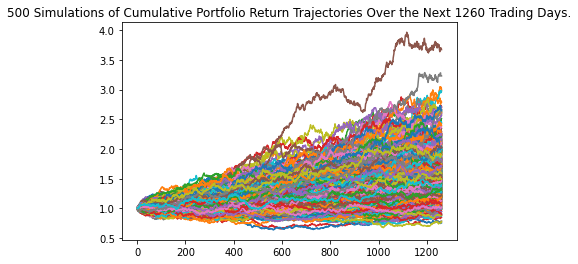

In [124]:
# Plot simulation outcomes
line_plot = MC_AGG_SPY.plot_simulation()

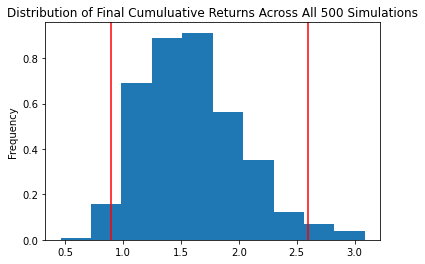

In [118]:
# Plot probability distribution and confidence intervals
dist_plot = MC_AGG_SPY.plot_distribution()

### Retirement Analysis

In [119]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_tbl = MC_AGG_SPY.summarize_cumulative_return()


# Print summary statistics
stats_tbl

count           500.000000
mean              1.596678
std               0.427461
min               0.457998
25%               1.272600
50%               1.549987
75%               1.861640
max               3.089693
95% CI Lower      0.895898
95% CI Upper      2.599401
Name: 1260, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [120]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
stats_ci_lower = round(stats_tbl[8]*initial_investment,2)
stats_ci_upper = round(stats_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
          f" ${stats_ci_lower} and ${stats_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17917.96 and $51988.02


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [121]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
stats_ci_lower = round(stats_tbl[8]*initial_investment,2)
stats_ci_upper = round(stats_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
          f" ${stats_ci_lower} and ${stats_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26876.93 and $77982.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [122]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
#Set Num of Simulations = 252 * 5

num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_AGG_SPY = MCSimulation(
   portfolio_data = df_portfolio_combined,
   weights = [0.40, 0.60],
   num_simulation = num_sims,
   num_trading_days = 252 * 5
)

In [110]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_AGG_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990918,1.002443,0.998904,0.998610,1.014995,0.992247,0.998333,1.014336,1.007139,1.020261,...,1.007484,1.006705,0.996242,0.989714,1.008135,1.004111,1.002869,1.005046,0.995104,0.989278
2,0.989614,1.004881,0.999634,0.994569,1.004376,0.995746,0.998918,1.000717,1.005899,1.010274,...,0.997098,1.003229,0.994491,0.991903,1.009016,1.003042,1.003150,0.991274,0.991553,0.999008
3,0.979619,1.006491,0.998515,1.005846,1.012450,1.001295,0.998799,0.999049,1.020616,1.011582,...,1.008366,0.990753,1.004045,0.987099,1.007952,1.003793,0.995812,1.006101,1.001629,1.008426
4,0.980746,1.009914,1.000892,1.013974,1.011715,0.980436,1.000090,1.007947,1.024150,1.015844,...,1.004823,0.989924,0.998405,0.987771,1.001221,1.008489,0.995589,1.006094,1.003087,1.009368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.187759,1.366703,1.730258,1.956695,1.430488,1.733794,1.171598,1.424300,1.136289,1.545641,...,1.403119,1.881607,1.079755,1.431965,1.229427,2.145865,1.841803,1.080451,1.227034,0.856285
1257,2.154731,1.363428,1.719773,1.957494,1.433761,1.729341,1.175440,1.437577,1.142754,1.523524,...,1.406220,1.891367,1.079875,1.426288,1.227562,2.150307,1.847291,1.080205,1.220869,0.844998
1258,2.175996,1.371539,1.738686,1.965332,1.440147,1.748481,1.181844,1.441531,1.138301,1.535132,...,1.403540,1.880926,1.095020,1.428061,1.220997,2.127915,1.840384,1.086572,1.236956,0.837002
1259,2.153204,1.373633,1.744071,1.980590,1.453539,1.755588,1.177473,1.440095,1.127689,1.523629,...,1.402795,1.872010,1.086424,1.417579,1.215142,2.109512,1.849651,1.097060,1.222047,0.840426


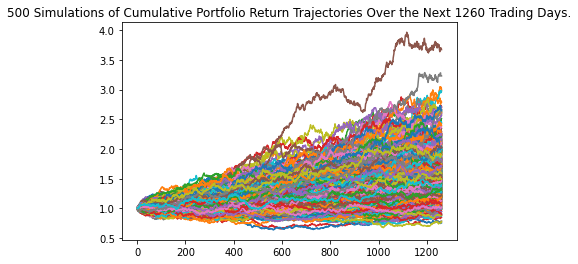

In [125]:
# Plot simulation outcomes
line_plot = MC_AGG_SPY.plot_simulation()

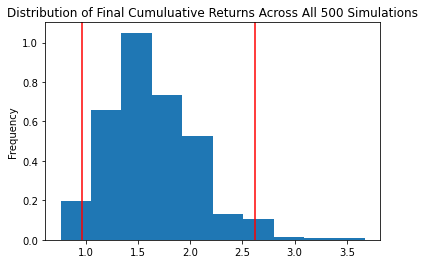

In [126]:
# Plot probability distribution and confidence intervals
dist_plot = MC_AGG_SPY.plot_distribution()

In [131]:
# Fetch summary statistics from the Monte Carlo simulation resultsm
stats_tbl_5 = MC_AGG_SPY.summarize_cumulative_return()
    
# Print summary statistics
stats_tbl_5

count           500.000000
mean              1.631505
std               0.414016
min               0.758212
25%               1.342431
50%               1.578503
75%               1.891733
max               3.673433
95% CI Lower      0.960784
95% CI Upper      2.624962
Name: 1260, dtype: float64

In [143]:

# Set initial investment
initial_investment_5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
stats_ci_lower_5 = round(stats_tbl_5[8]*initial_investment_5,2)
stats_ci_upper_5 = round(stats_tbl_5[9]*initial_investment_5,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
          f" ${stats_ci_lower_5} and ${stats_ci_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $57647.05 and $157497.7


### Ten Years Retirement Option

In [135]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_AGG_SPY = MCSimulation(
   portfolio_data = df_portfolio_combined,
   weights = [0.40, 0.60],
   num_simulation = num_sims,
   num_trading_days = 252 * 10
)

In [136]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_AGG_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000593,1.001126,0.995864,0.994971,0.991664,0.993819,1.010875,0.999323,0.989639,0.995621,...,0.998278,0.995197,0.989568,1.001379,0.998986,1.001520,1.004126,1.009813,1.011622,1.014511
2,1.008361,1.004629,0.995792,1.007634,0.987789,0.987448,1.009390,1.000878,1.002561,1.001051,...,1.007428,0.992328,0.994258,1.002168,1.007438,1.010130,0.998605,1.015298,1.023802,1.005509
3,1.012434,1.009941,1.002660,1.010014,0.966650,0.981527,1.003754,0.994486,1.006454,0.999449,...,1.021555,0.994397,0.993831,1.003242,1.020313,1.019000,0.984560,1.008994,1.021382,0.997488
4,1.017750,1.009811,1.000370,1.012540,0.976210,0.978812,1.009737,0.987210,0.999420,0.998532,...,1.015438,0.994734,0.993566,0.988826,1.034973,1.016337,0.981159,1.022811,1.011418,1.006875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.762154,4.224698,3.529038,2.595804,4.725762,2.096250,2.925575,2.875697,2.960139,2.780684,...,1.645233,1.965085,1.740785,2.198144,4.424406,1.626103,2.451098,1.958478,1.742908,1.621283
2517,1.776751,4.273516,3.546808,2.590097,4.677977,2.087407,2.880002,2.848816,2.975167,2.796641,...,1.636178,1.934034,1.751132,2.214978,4.408362,1.627132,2.450028,1.959661,1.730287,1.601942
2518,1.788252,4.266224,3.527630,2.582373,4.715004,2.089133,2.875025,2.829605,2.945992,2.774783,...,1.646895,1.929512,1.748291,2.230093,4.412502,1.637311,2.481781,1.978408,1.709510,1.607873
2519,1.804264,4.234789,3.512363,2.599992,4.747389,2.067640,2.884846,2.836410,2.954835,2.799340,...,1.657438,1.916702,1.758091,2.255664,4.420185,1.652115,2.457481,1.969486,1.734337,1.593546


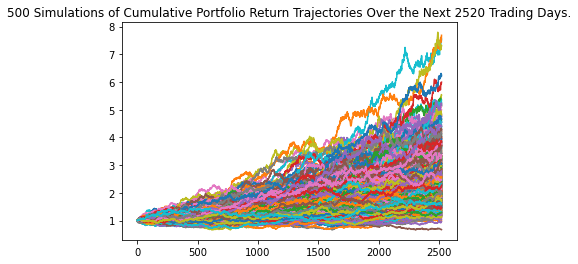

In [137]:
# Plot simulation outcomes
line_plot = MC_AGG_SPY.plot_simulation()

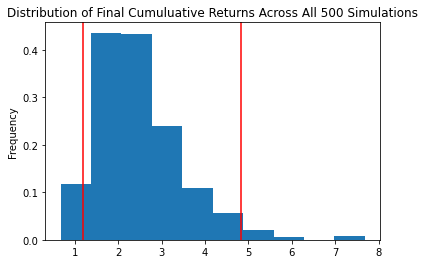

In [138]:
# Plot probability distribution and confidence intervals
dist_plot = MC_AGG_SPY.plot_distribution()

In [139]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_tbl_10 = MC_AGG_SPY.summarize_cumulative_return()
    
# Print summary statistics
stats_tbl_10

count           500.000000
mean              2.499848
std               0.997640
min               0.673435
25%               1.812843
50%               2.313315
75%               2.959831
max               7.684618
95% CI Lower      1.193397
95% CI Upper      4.826124
Name: 2520, dtype: float64

In [144]:
# Set initial investment
initial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
stats_ci_lower_10 = round(stats_tbl_10[8]*initial_investment_10,2)
stats_ci_upper_10 = round(stats_tbl_10[9]*initial_investment_10,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
          f" ${stats_ci_lower_10} and ${stats_ci_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $71603.83 and $289567.43
